#  Approach to predict the Water Quality Assurance using various ML Techniques


In [68]:
#Importing Regular EDA and plotting libraries
import pandas as pd # pandas is so commonly used, it's shortened to pd
import numpy as np # np is short for numpy
import seaborn as sns  # seaborn gets shortened to sns
import plotly.express as px
import matplotlib.pyplot as plt

## Models & Models Evalutaers

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection  import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [8]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


## Load the Data

In [9]:
df=pd.read_csv("water_potability.csv")

## Analyze the Dataset

In [10]:
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [11]:
df.tail()

ph    Hardness        Solids  Chloramines     Sulfate  \
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1

In [12]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [13]:
df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [15]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

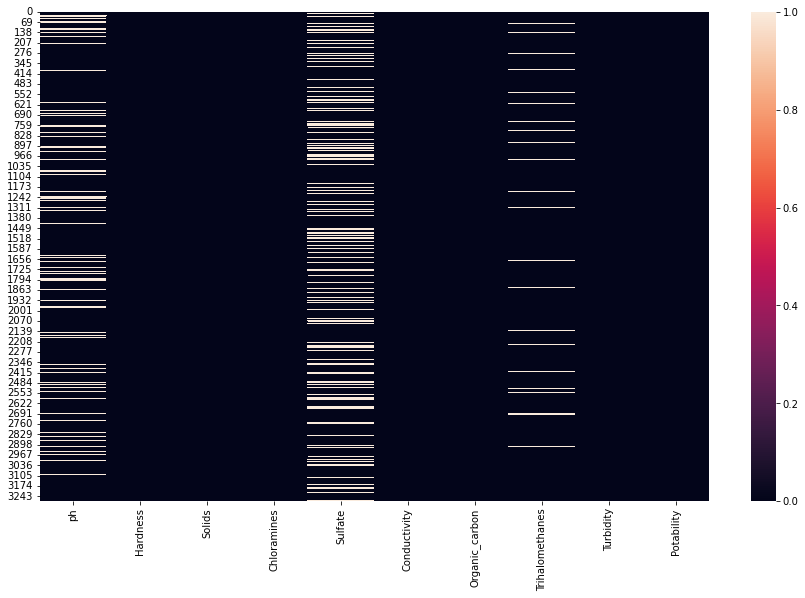

In [16]:
# Visualize missing data in the DataFrame using a heatmap.
plt.figure(figsize=(15,9))
sns.heatmap(df.isnull())

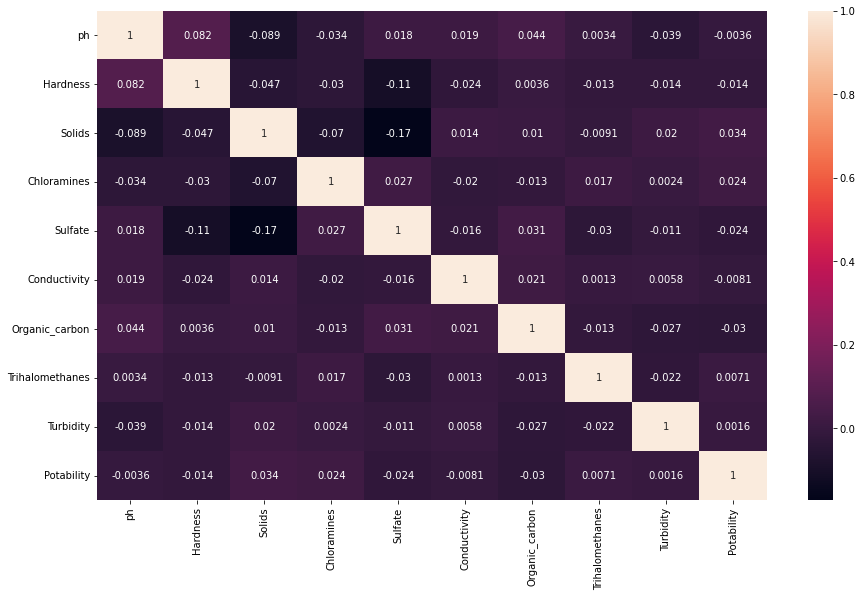

In [17]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True)

## Data Visualization

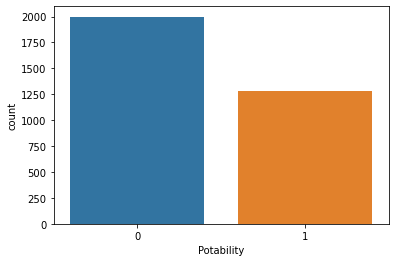

In [18]:
sns.countplot(x="Potability",data=df)

In [19]:
df["Potability"].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

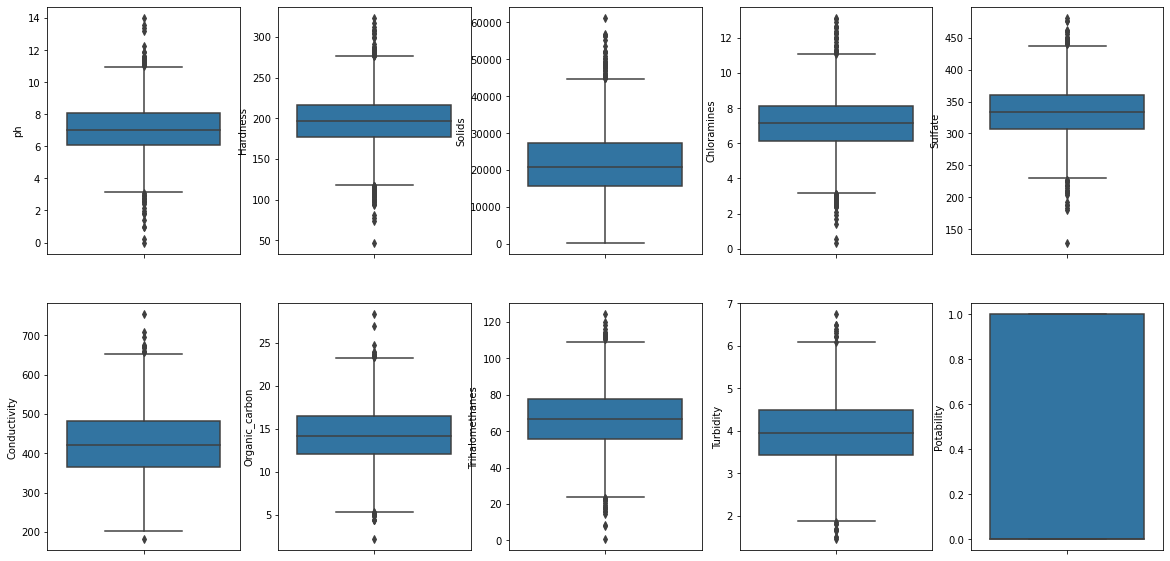

In [20]:
#Visulazition dataset also checking for outliers
fig, ax=plt.subplots(ncols=5, nrows=2, figsize=(20,10))
ax=ax.flatten()
index=0
for col,vlaues in df.items():
    sns.boxplot(y=col,data=df,ax=ax[index])
    index +=1

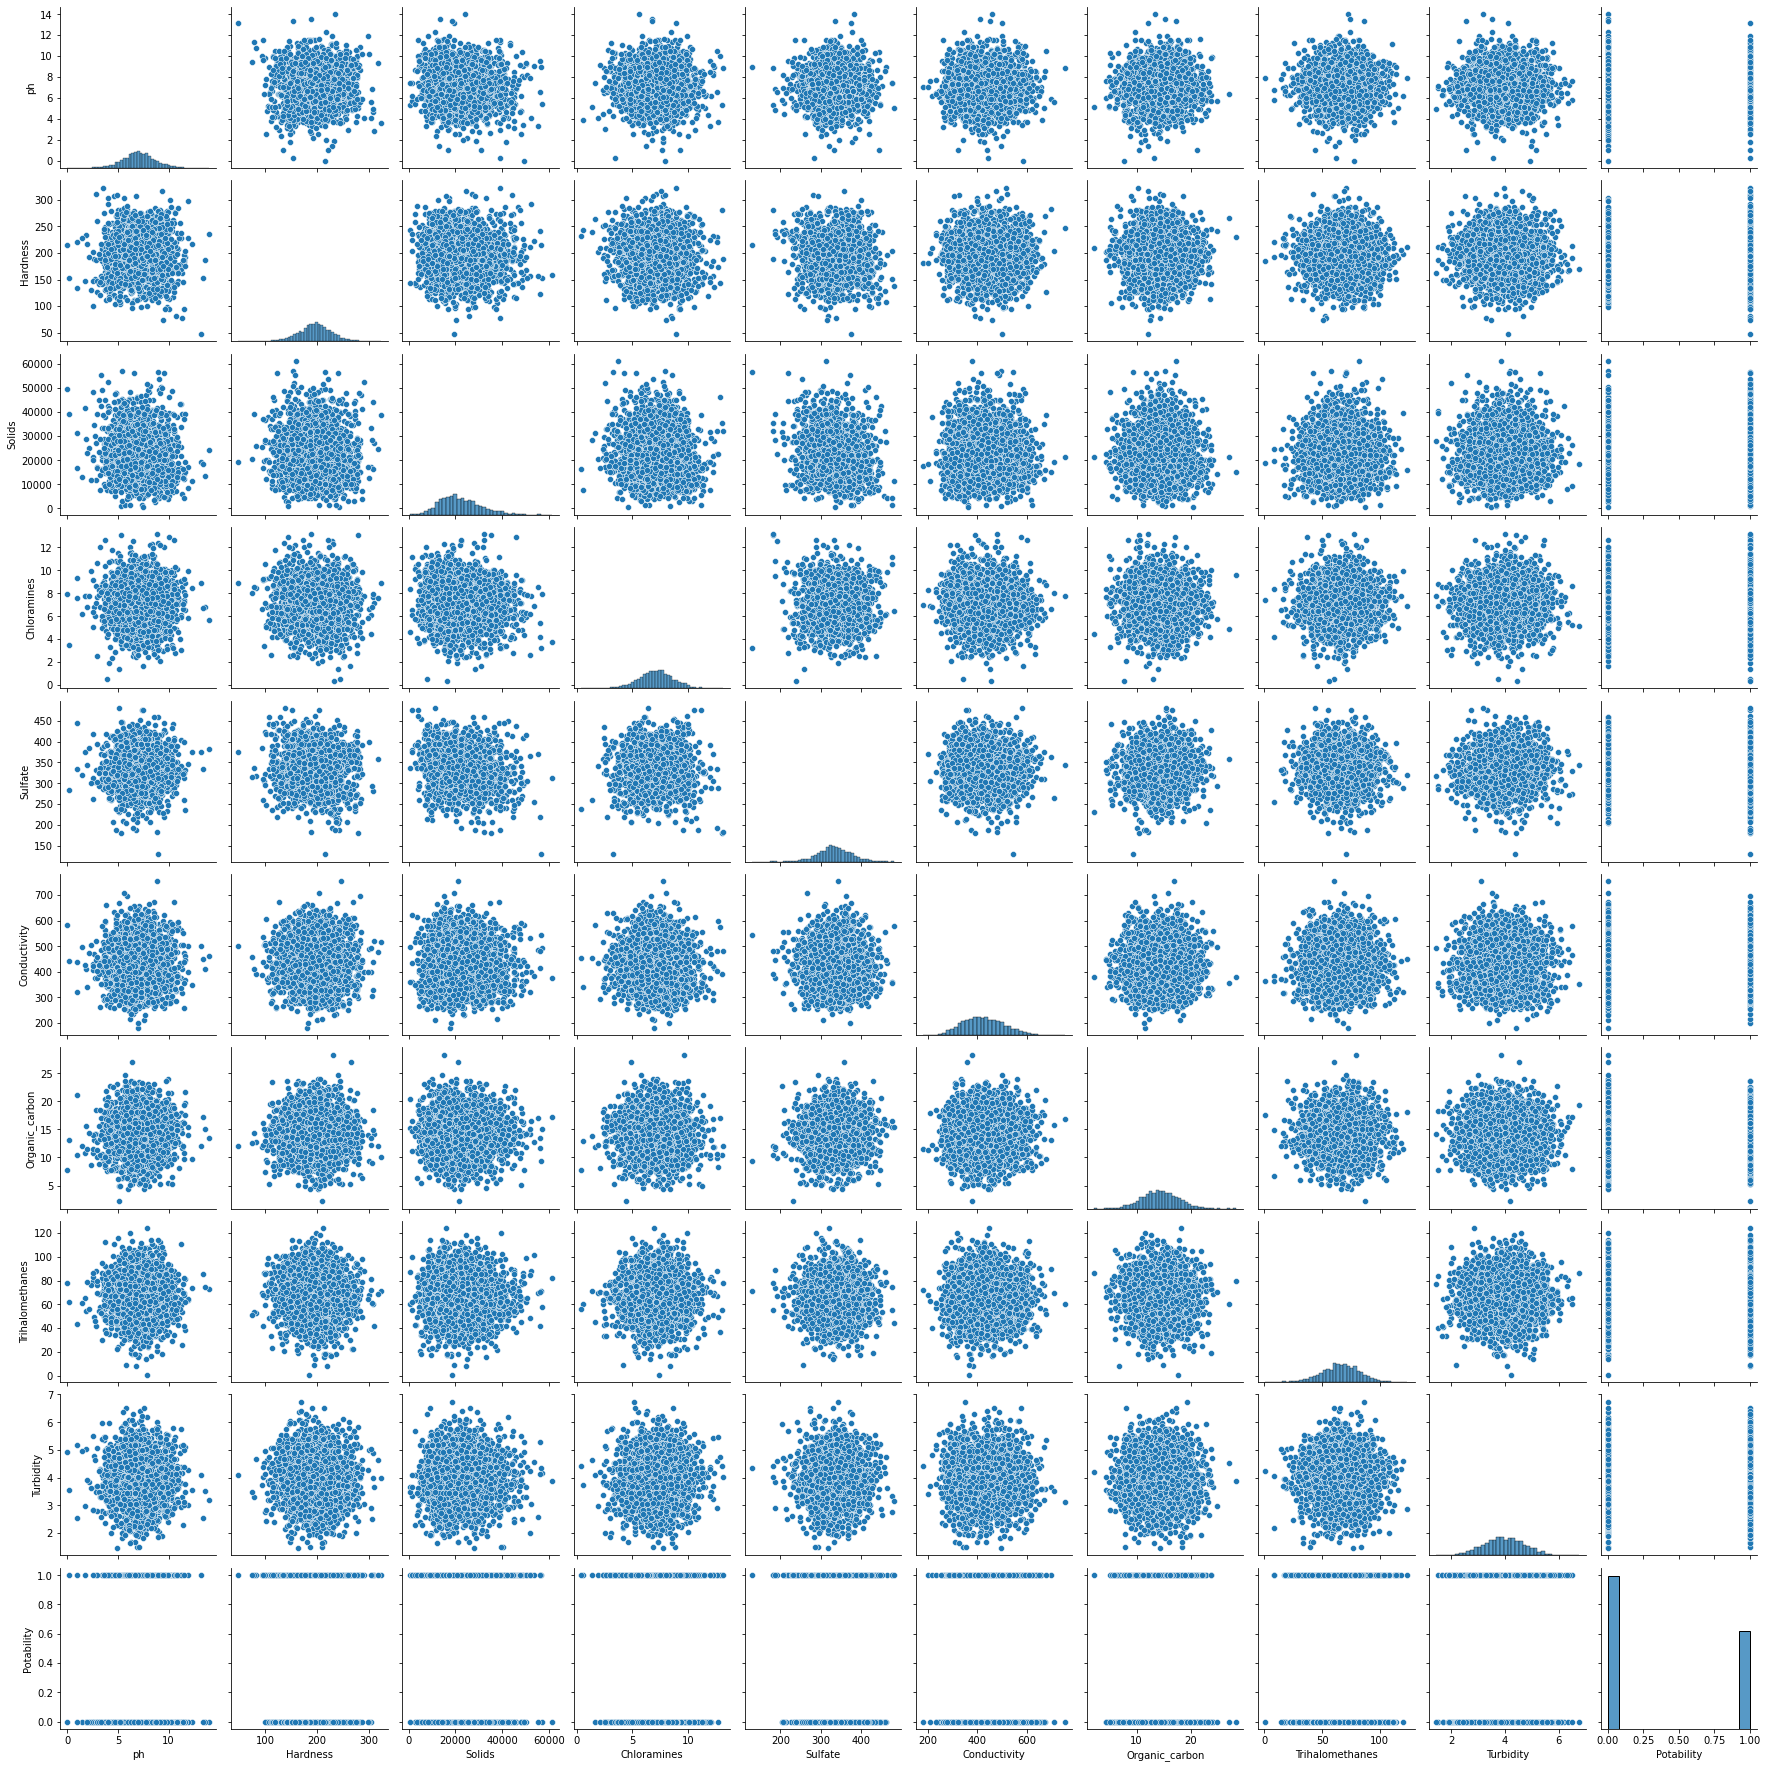

In [21]:
sns.pairplot(df)

In [22]:
fig= px.pie(df,names="Potability",hole=0.4,template="plotly")
fig.show()

In [23]:
fig=px.scatter(df,x= "ph",y= "Sulfate",color="Potability",template= "plotly_dark")
fig.show()

In [24]:
fig=px.scatter(df,x= "Organic_carbon",y= "Hardness",color="Potability",template= "plotly_dark")
fig.show()

## Preprocess the Data

Text(0, 0.5, 'Missing Value Percent')

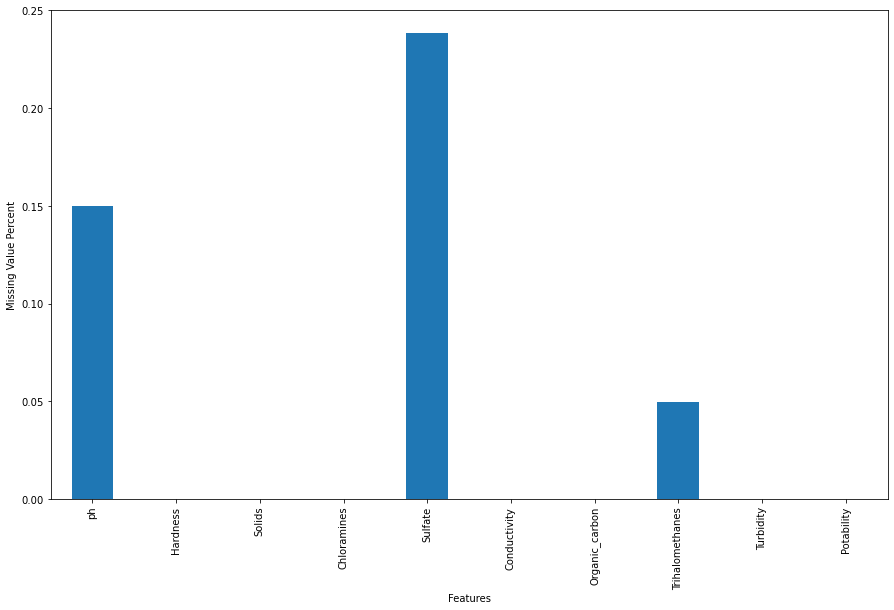

In [25]:
#Filling Null Values
df.isnull().mean().plot.bar(figsize=(15,9))
plt.xlabel("Features")
plt.ylabel("Missing Value Percent")

In [26]:
df["ph"]=df["ph"].fillna(df["ph"].mean())
df["Sulfate"]=df["Sulfate"].fillna(df["Sulfate"].mean())
df["Trihalomethanes"]=df["Trihalomethanes"].fillna(df["Trihalomethanes"].mean())


In [27]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

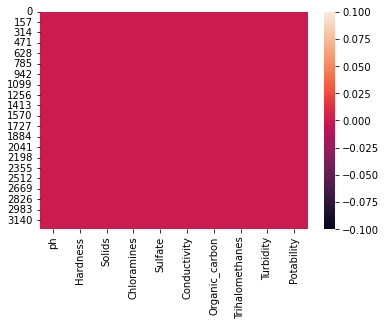

In [28]:
sns.heatmap(df.isnull())

# Data Preparations for Training


In [29]:
x=df.drop("Potability",axis=1)
y=df["Potability"]

In [30]:
x.shape, y.shape

((3276, 9), (3276,))

In [31]:
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[-8.46038683e-15,  2.59194711e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30614943e+00, -1.28629758e+00],
       [-2.28933938e+00, -2.03641367e+00, -3.85986650e-01, ...,
         2.70597240e-01, -6.38479983e-01,  6.84217891e-01],
       [ 6.92867789e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116857e-01,  1.50940884e-03, -1.16736546e+00],
       ...,
       [ 1.59125368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329234e-01,  2.18748247e-01, -8.56006782e-01],
       [-1.32951593e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.03468419e-01,  9.50797383e-01],
       [ 5.40150905e-01, -3.85462310e-02, -5.25811937e-01, ...,
         5.60940070e-01,  7.80223466e-01, -2.12445866e+00]])

In [32]:
 x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)

In [33]:
x_train.shape , x_test.shape

((2620, 9), (656, 9))

## LOGISTIC REGRESSION

In [34]:
# LOGISTIC REGRESSION 
from sklearn.linear_model import LogisticRegression

#object of LR
model_lr= LogisticRegression()

In [35]:
#Training Model
model_lr.fit(x_train,y_train)

LogisticRegression()

In [36]:
#Making Prediction
pred_lr=model_lr.predict(x_test)

In [37]:
# Accuracy Score
accuracy_score_lr= accuracy_score(y_test,pred_lr)
accuracy_score_lr*100

62.04268292682927

# DECISION TREE CLASSIFIER

In [38]:
#Creating the object of the model
model_de=DecisionTreeClassifier(max_depth=4)

In [39]:
#Training of Decioson tree
model_de.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [40]:
#Making prediction using Decision tree
pred_de=model_de.predict(x_test)

In [41]:
# Accuracy Score
accuracy_score_de= accuracy_score(y_test,pred_de)
accuracy_score_de*100

64.78658536585365

In [42]:
#Confusion Matrix
cm3=confusion_matrix(y_test,pred_de)
cm3

array([[385,  23],
       [208,  40]], dtype=int64)

# RANDOM FOREST CLASSIFIERS

In [43]:
#Creating the object of the model
model_rf=RandomForestClassifier()

In [44]:
#Model training of Random Forest
model_rf.fit(x_train,y_train)

RandomForestClassifier()

In [45]:
#Making Prediction 
pred_rf=model_rf.predict(x_test)

In [46]:
# Accuracy Score
accuracy_score_rf= accuracy_score(y_test,pred_rf)
accuracy_score_rf*100

67.83536585365853

In [47]:
#Confusion Matrix
cm4=confusion_matrix(y_test,pred_rf)
cm4

array([[345,  63],
       [148, 100]], dtype=int64)

# KNN--K-Neighbour


In [53]:
#Creating the model object
model_knn=KNeighborsClassifier()

In [56]:
for i in range(4,15):
    model_knn=KNeighborsClassifier(n_neighbors=i)
    model_knn.fit(x_train,y_train)
    pred_knn=model_knn.predict(x_test)
    accuracy_score_knn=accuracy_score(y_test,pred_knn)
    print(i,accuracy_score_knn)

4 0.6524390243902439
5 0.6524390243902439
6 0.6722560975609756
7 0.6829268292682927
8 0.6646341463414634
9 0.6615853658536586
10 0.6692073170731707
11 0.6707317073170732
12 0.6814024390243902
13 0.6844512195121951
14 0.6783536585365854


In [57]:
model_knn=KNeighborsClassifier(n_neighbors=13)
model_knn.fit(x_train,y_train)
pred_knn=model_knn.predict(x_test)
accuracy_score_knn=accuracy_score(y_test,pred_knn)
print(accuracy_score_knn*100)

68.4451219512195


In [61]:
models=pd.DataFrame({
    "Model":["Logistic Regression",
            "Decision Tree",
            "Random Forest",
            "KNN_Classifier"],
    "Accuracy Score":[accuracy_score_lr,accuracy_score_de,accuracy_score_rf,accuracy_score_knn]
    
})

In [64]:
models

Model  Accuracy Score
0  Logistic Regression        0.620427
1        Decision Tree        0.647866
2        Random Forest        0.678354
3       KNN_Classifier        0.684451

Model  Accuracy Score
3       KNN_Classifier        0.684451
2        Random Forest        0.678354
1        Decision Tree        0.647866
0  Logistic Regression        0.620427

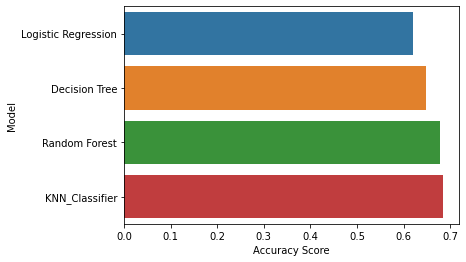

In [66]:
sns.barplot(x="Accuracy Score",y="Model",data=models)
models.sort_values(by="Accuracy Score",ascending=False)

## Conclusion

Conclusion :- Here KNN classifier has achieved highest accuracy.